In [27]:
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
from matplotlib.cm import viridis
from matplotlib import style
import pandas as pd
import numpy as np
import requests
import gmaps
import json
import os
import gmaps.geojson_geometries

from api_keys import g_key
import requests
from pprint import pprint
plt.style.use("seaborn")

In [2]:
rent_df = pd.read_csv("rent20-22.csv", index_col=0)
rent_df.columns

Index(['state', 'county', 'county name', 'state initial', 'studio_2020',
       'studio_2021', 'studio_2022', 'bedroom_1_2020', 'bedroom_1_2021',
       'bedroom_1_2022', 'bedroom_2_2020', 'bedroom_2_2021', 'bedroom_2_2022',
       'bedroom_3_2020', 'bedroom_3_2021', 'bedroom_3_2022', 'bedroom_4_2020',
       'bedroom_4_2021', 'bedroom_4_2022', 'pop2017'],
      dtype='object')

In [3]:
rent_df

,state,county,county name,state initial,studio_2020,studio_2021,studio_2022,bedroom_1_2020,bedroom_1_2021,bedroom_1_2022,bedroom_2_2020,bedroom_2_2021,bedroom_2_2022,bedroom_3_2020,bedroom_3_2021,bedroom_3_2022,bedroom_4_2020,bedroom_4_2021,bedroom_4_2022,pop2017
0,48,59,Callahan County,TX,673,761.0,715.0,699,789.0,760.0,920,1028.0,981.0,1209,1383.0,1337.0,1560,1764.0,1658.0,13660
1,48,253,Jones County,TX,673,761.0,715.0,699,789.0,760.0,920,1028.0,981.0,1209,1383.0,1337.0,1560,1764.0,1658.0,19970
2,48,441,Taylor County,TX,673,761.0,715.0,699,789.0,760.0,920,1028.0,981.0,1209,1383.0,1337.0,1560,1764.0,1658.0,135370
3,72,3,Aguada Municipio,PR,386,401.0,407.0,397,414.0,423.0,452,472.0,486.0,591,602.0,604.0,713,720.0,711.0,39470
4,72,5,Aguadilla Municipio,PR,386,401.0,407.0,397,414.0,423.0,452,472.0,486.0,591,602.0,604.0,713,720.0,711.0,55720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4764,72,133,Santa Isabel Municipio,PR,370,386.0,389.0,373,395.0,396.0,437,450.0,451.0,582,599.0,614.0,656,666.0,674.0,22475
4765,72,147,Vieques Municipio,PR,370,386.0,389.0,373,395.0,396.0,437,450.0,451.0,582,599.0,614.0,656,666.0,674.0,8930
4766,78,10,St. Croix,VI,887,926.0,964.0,905,945.0,984.0,1105,1154.0,1201.0,1377,1435.0,1485.0,1497,1565.0,1629.0,53234
4767,78,20,St. John,VI,1177,1230.0,1280.0,1394,1458.0,1517.0,1733,1812.0,1885.0,2160,2254.0,2330.0,2348,2457.0,2556.0,4197


In [4]:
rent_ga = rent_df[rent_df["state"] == 13]
rent_ga

,state,county,county name,state initial,studio_2020,studio_2021,studio_2022,bedroom_1_2020,bedroom_1_2021,bedroom_1_2022,bedroom_2_2020,bedroom_2_2021,bedroom_2_2022,bedroom_3_2020,bedroom_3_2021,bedroom_3_2022,bedroom_4_2020,bedroom_4_2021,bedroom_4_2022,pop2017
14,13,7,Baker County,GA,643,668.0,562.0,666,690.0,581.0,791,814.0,704.0,1031,1054.0,887.0,1151,1215.0,1036.0,3250
15,13,95,Dougherty County,GA,643,668.0,711.0,666,690.0,737.0,791,814.0,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,91520
16,13,177,Lee County,GA,643,668.0,711.0,666,690.0,737.0,791,814.0,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,29215
17,13,273,Terrell County,GA,643,668.0,711.0,666,690.0,737.0,791,814.0,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,8980
18,13,321,Worth County,GA,643,668.0,711.0,666,690.0,737.0,791,814.0,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,20810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,13,309,Wheeler County,GA,513,507.0,545.0,516,510.0,549.0,651,648.0,704.0,939,927.0,870.0,998,975.0,955.0,7950
2296,13,311,White County,GA,602,619.0,693.0,606,623.0,698.0,764,763.0,827.0,1010,1006.0,1052.0,1035,1035.0,1121.0,28510
2297,13,315,Wilcox County,GA,513,507.0,545.0,516,510.0,549.0,651,648.0,704.0,811,865.0,1000.0,998,975.0,1036.0,8895
2298,13,317,Wilkes County,GA,557,558.0,592.0,560,562.0,596.0,738,740.0,784.0,939,975.0,1035.0,1132,1114.0,1154.0,9905


In [5]:
bedroom_amount = ["studio_2021", "bedroom_1_2021", "bedroom_2_2021", "bedroom_3_2021", "bedroom_4_2021"]
bedroom_quantile = []
for room in bedroom_amount:
    bedroom = rent_ga.loc[:, room]
    #quartiles = bedroom.quantile([.25, .5, .75])
    bedroom_quantile.append(bedroom.quantile([.25, .5, .75]))

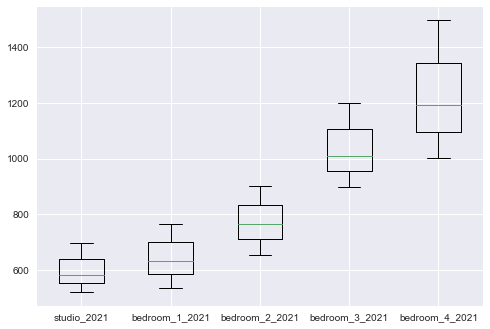

In [6]:
x_axis = np.arange(len(bedroom_amount))
tick_locations = [value + 1 for value in x_axis]
fig1, ax1 = plt.subplots()
#ax1.set_ylabel("")
ax1.boxplot(bedroom_quantile, sym = 'b')
plt.xticks(tick_locations, bedroom_amount)
plt.show()

In [41]:
'''def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df'''

In [43]:
#rent_ga = remove_outliers(rent_ga, ["pop2017"], 4)

Working on column: pop2017


R value: 0.5253005375504431


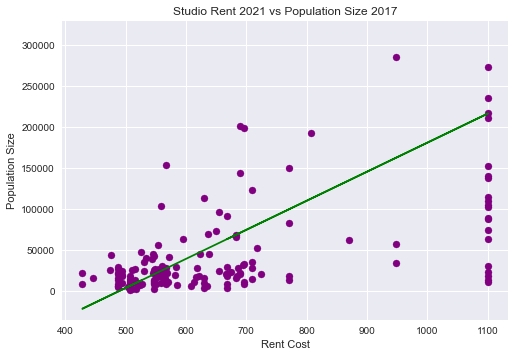

In [26]:
r = np.corrcoef(rent_ga["studio_2021"], rent_ga["pop2017"])
m, b = np.polyfit(rent_ga["studio_2021"], rent_ga["pop2017"], 1)
print(f"R value: {r[0][1]}")

plt.scatter(rent_ga["studio_2021"], rent_ga["pop2017"], color = "purple")
plt.plot(rent_ga["studio_2021"], (m * rent_ga["studio_2021"]) + b, color = "green")

plt.xlabel("Rent Cost")
plt.ylabel("Population Size")
plt.ylim(bottom = -35000, top = 330000)
plt.title("Studio Rent 2021 vs Population Size 2017")
plt.grid(True)
plt.show()

R value: 0.525592772585349


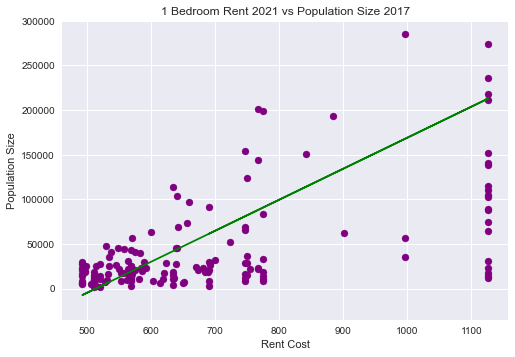

In [30]:
r = np.corrcoef(rent_ga["bedroom_1_2021"], rent_ga["pop2017"])
m, b = np.polyfit(rent_ga["bedroom_1_2021"], rent_ga["pop2017"], 1)
print(f"R value: {r[0][1]}")

plt.scatter(rent_ga["bedroom_1_2021"], rent_ga["pop2017"], color = "purple")
plt.plot(rent_ga["bedroom_1_2021"], (m * rent_ga["bedroom_1_2021"]) + b, color = "green")

plt.xlabel("Rent Cost")
plt.ylabel("Population Size")
plt.ylim(bottom = -35000, top = 300000)
plt.title("1 Bedroom Rent 2021 vs Population Size 2017")
plt.grid(True)
plt.show()

R value: 0.5253140763104599


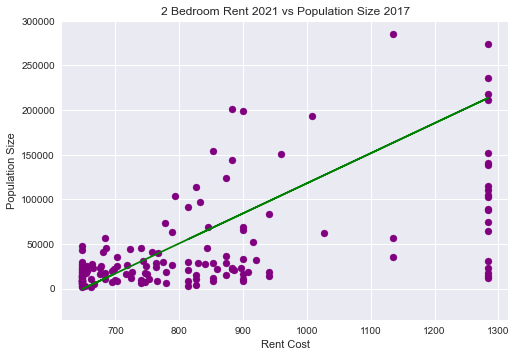

In [34]:
r = np.corrcoef(rent_ga["bedroom_2_2021"], rent_ga["pop2017"])
m, b = np.polyfit(rent_ga["bedroom_2_2021"], rent_ga["pop2017"], 1)
print(f"R value: {r[0][1]}")

plt.scatter(rent_ga["bedroom_2_2021"], rent_ga["pop2017"], color = "purple")
plt.plot(rent_ga["bedroom_2_2021"], (m * rent_ga["bedroom_2_2021"]) + b, color = "green")

plt.xlabel("Rent Cost")
plt.ylabel("Population Size")
plt.ylim(bottom = -35000, top = 300000)
plt.title("2 Bedroom Rent 2021 vs Population Size 2017")
plt.grid(True)
plt.show()

R value: 0.5083381247865446


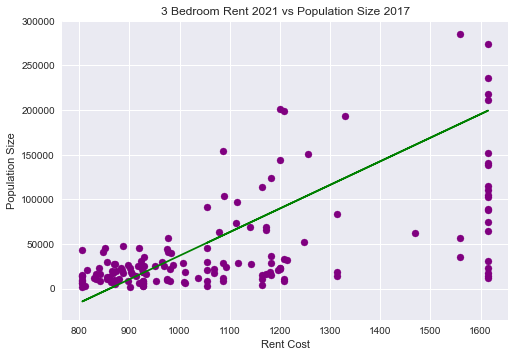

In [35]:
r = np.corrcoef(rent_ga["bedroom_3_2021"], rent_ga["pop2017"])
m, b = np.polyfit(rent_ga["bedroom_3_2021"], rent_ga["pop2017"], 1)
print(f"R value: {r[0][1]}")

plt.scatter(rent_ga["bedroom_3_2021"], rent_ga["pop2017"], color = "purple")
plt.plot(rent_ga["bedroom_3_2021"], (m * rent_ga["bedroom_3_2021"]) + b, color = "green")

plt.xlabel("Rent Cost")
plt.ylabel("Population Size")
plt.ylim(bottom = -35000, top = 300000)
plt.title("3 Bedroom Rent 2021 vs Population Size 2017")
plt.grid(True)
plt.show()

R value: 0.5017811522250264


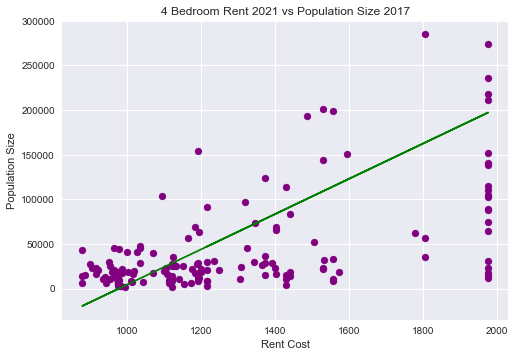

In [37]:
r = np.corrcoef(rent_ga["bedroom_4_2021"], rent_ga["pop2017"])
m, b = np.polyfit(rent_ga["bedroom_4_2021"], rent_ga["pop2017"], 1)
print(f"R value: {r[0][1]}")

plt.scatter(rent_ga["bedroom_4_2021"], rent_ga["pop2017"], color = "purple")
plt.plot(rent_ga["bedroom_4_2021"], (m * rent_ga["bedroom_4_2021"]) + b, color = "green")

plt.xlabel("Rent Cost")
plt.ylabel("Population Size")
plt.ylim(bottom = -35000, top = 300000)
plt.title("4 Bedroom Rent 2021 vs Population Size 2017")
plt.grid(True)
plt.show()

In [38]:
rent_ga["latitude"] = ""
rent_ga["longitude"] = "" 

C:\Users\cabon\AppData\Local\Temp/ipykernel_10732/599592830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_ga["latitude"] = ""
C:\Users\cabon\AppData\Local\Temp/ipykernel_10732/599592830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_ga["longitude"] = ""


In [40]:
for index, row in rent_ga.iterrows():
    
    address = row["county name"]
    response = requests.get(f'https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={g_key}').json()
    
    try:
        rent_ga.loc[index,"latitude"] = response['results'][0]['geometry']['location']['lat']
        rent_ga.loc[index,"longitude"] = response['results'][0]['geometry']['location']['lng']
        
    except:
        print(f'{address} - {index} not found in API')

In [44]:
gmaps.configure(api_key=g_key)

locations = rent_ga[["latitude", "longitude"]]
pop = rent_ga["pop2017"]
fig = gmaps.figure(center=(39.8097343, -98.5556199), zoom_level=4)
heatLayer = gmaps.heatmap_layer(locations, weights=pop, max_intensity = 500000, point_radius = 20)
fig.add_layer(heatLayer)

fig

Figure(layout=FigureLayout(height='420px'))

In [51]:
import gmaps.geojson_geometries
from matplotlib.cm import viridis
from matplotlib.colors import to_hex

In [70]:
min_pop = min(rent_ga["pop2017"])
max_pop = max(rent_ga["pop2017"])
pop_range = max_pop - min_pop

def calculate_color(pop):
    norm = (pop - min_pop) / pop_range

    # invert pop so that high inequality gives dark color
    inv = 1.0 - norm

    # transform the pop coefficient to a matplotlib color
    color = viridis(inv)

    # transform from a matplotlib color to a valid CSS color
    gmaps_color = to_hex(color, keep_alpha=False)
    return gmaps_color

In [ ]:
gmaps.configure(api_key=g_key)
county_geojson = gmaps.geojson_geometries.load_geometry('us-counties')
geojson_layer = gmaps.geojson_layer(county_geojson)
rent_ga["county"] = rent_ga["county name"].str.split('\s+').str[0]

In [123]:
colors = []
for feature in county_geojson['features']:
    if feature['properties']['STATE'] == '13':
        county = rent_ga[rent_ga['county'].str.contains(feature['properties']['NAME'])]
        try:
            color = calculate_color(county["pop2017"])
        except:
            color = (0, 0, 0, 0.3)
        colors.append(color)
colors

2215    Appling
Name: county, dtype: object worked
60    Barrow
Name: county, dtype: object worked
1666    Bryan
Name: county, dtype: object worked
2226    Candler
Name: county, dtype: object worked
2228    Chattooga
Name: county, dtype: object worked
56    Clarke
Name: county, dtype: object worked
2232    Colquitt
Name: county, dtype: object worked
1054    Crawford
Name: county, dtype: object worked
2236    Dodge
Name: county, dtype: object worked
2240    Emanuel
Name: county, dtype: object worked
70    Fayette
Name: county, dtype: object worked
2244    Gilmer
Name: county, dtype: object worked
2295    Wheeler
Name: county, dtype: object worked
652    Whitfield
Name: county, dtype: object worked
2299    Wilkinson
Name: county, dtype: object worked
2245    Glascock
Name: county, dtype: object worked
2246    Gordon
Name: county, dtype: object worked
2247    Grady
Name: county, dtype: object worked
748    Hall
Name: county, dtype: object worked
2253    Jackson
Name: county, dtype: object

['#f4e61e',
 '#d0e11c',
 '#eae51a',
 '#f8e621',
 '#f1e51d',
 '#b0dd2f',
 '#e2e418',
 '#f8e621',
 '#f4e61e',
 '#f1e51d',
 '#b8de29',
 '#ece51b',
 '#fbe723',
 '#bddf26',
 '#fbe723',
 '#fde725',
 '#dde318',
 '#f1e51d',
 '#81d34d',
 '#d8e219',
 '#efe51c',
 '#e2e418',
 '#ece51b',
 '#fbe723',
 '#fbe723',
 '#bade28',
 '#efe51c',
 '#e5e419',
 '#fbe723',
 '#fbe723',
 '#fde725',
 '#e7e419',
 '#d2e21b',
 '#efe51c',
 '#f4e61e',
 '#f8e621',
 '#39568c',
 '#e5e419',
 '#a0da39',
 '#a5db36',
 '#f1e51d',
 '#efe51c',
 '#f6e620',
 '#c5e021',
 '#fde725',
 '#dae319',
 '#f8e621',
 '#c0df25',
 '#f1e51d',
 '#fbe723',
 '#f8e621',
 '#e2e418',
 '#bddf26',
 '#f8e621',
 '#f4e61e',
 '#d0e11c',
 '#fbe723',
 '#f8e621',
 '#f8e621',
 '#67cc5c',
 '#52c569',
 '#f8e621',
 '#f4e61e',
 '#e5e419',
 '#fbe723',
 '#efe51c',
 '#fbe723',
 '#f6e620',
 '#fbe723',
 '#f4e61e',
 '#f8e621',
 '#fbe723',
 '#f4e61e',
 '#7fd34e',
 '#fde725',
 '#f6e620',
 '#9bd93c',
 '#b5de2b',
 '#f4e61e',
 '#efe51c',
 '#f4e61e',
 '#f1e51d',
 '#fbe723',
 '#e

In [119]:
ga_county = {'type': 'FeatureCollection', 'features':[]}

for feature in county_geojson['features']:
    if feature['properties']['STATE'] == '13':
        ga_county['features'].append(feature)
ga_county

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'GEO_ID': '0500000US13001',
    'STATE': '13',
    'COUNTY': '001',
    'NAME': 'Appling',
    'LSAD': 'County',
    'CENSUSAREA': 507.081},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-82.52142, 31.710796],
      [-82.520251, 31.838388],
      [-82.431362, 31.837993],
      [-82.431531, 31.966182],
      [-82.225042, 31.913074],
      [-82.142843, 31.8993],
      [-82.048582, 31.827075],
      [-82.133013, 31.773404],
      [-82.132794, 31.471262],
      [-82.226585, 31.530699],
      [-82.52142, 31.710796]]]}},
  {'type': 'Feature',
   'properties': {'GEO_ID': '0500000US13013',
    'STATE': '13',
    'COUNTY': '013',
    'NAME': 'Barrow',
    'LSAD': 'County',
    'CENSUSAREA': 160.309},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-83.647031, 33.906198],
      [-83.763835, 33.896682],
      [-83.799104, 33.929844],
      [-83.869115, 34.004316],
      [-83.817682, 34.127493],
 

In [120]:
fig = gmaps.figure()
pop_layer = gmaps.geojson_layer(
    ga_county,
    fill_color=colors,
    stroke_color=colors,
    fill_opacity=0.8)
fig.add_layer(pop_layer)
fig

Figure(layout=FigureLayout(height='420px'))